<a href="https://colab.research.google.com/github/mariohaya/key-search/blob/main/Copy_of_15b_Datathon_4_Analyze_Clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Video Tutorial

https://drive.google.com/drive/u/1/folders/1kHPkwKrntsdvnmU0wRulvXe_-mQ2mmgf

# Import Modules

In [11]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Mount Google Drive

In [12]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


# Paths & Filenames

In [13]:
path_data = '/content/drive/MyDrive/Data Science Fundamentals/Data/'

In [4]:
os.listdir(path_data)

['Week 4 Data',
 'Week 3 wikipedia fruit',
 'employee_2.gsheet',
 'employee_2.xlsx',
 'Week 7 Data',
 'Copy of 1. All Candidates v2.xlsx',
 '2. NL Candidates.xlsx',
 '3. NL Agg Covars.xlsx',
 '2. RL Candidates.xlsx',
 'Dashboard data',
 '4. NL Agg Looker.gsheet',
 '4. NL Agg Looker.xlsx']

In [16]:
# filenames for imported files
filename_dat = 'Copy of 5. Candidates_Clustered.xlsx'

# Import & Format Data

In [17]:
cand = pd.read_excel(path_data + filename_dat)

In [18]:
cand.shape

(48285, 27)

In [21]:
cand.head(2)

,ElectionDate,Position,Tier2,ElectionDistrict,Tier3,Tier4,NewCandID,CandName,CandSex,CandBirthyear,...,tier,branch,IsExperience,ExperienceTier,RunCount,position_code,Career_Event,Career_Sequence,Length,k_labels
0,20101127,村里長,臺南市,臺南市,安定區,保西里,丁主亮_1961,丁主亮,male,1961.0,...,4,Executive,True,4.0,4,LE,M,MMMN,4,red
1,20141129,村里長,臺南市,臺南市,安定區,保西里,丁主亮_1961,丁主亮,male,1961.0,...,4,Executive,True,4.0,4,LE,M,MMMN,4,red


In [20]:
len(cand.Career_Sequence.unique())

1572

In [ ]:
len(cand.NewCandID.unique())

12933

In [ ]:
# number of clusters
len(cand.k_labels.unique())

5

In [ ]:
# unique sequences and total sequences per cluster
cand[["k_labels","Career_Sequence","NewCandID"]].groupby("k_labels",as_index=False).agg(
    Unique_Sequence_Count = ("Career_Sequence","nunique"),
    Sequence_Count = ("NewCandID","count")
)

,k_labels,Unique_Sequence_Count,Sequence_Count
0,blue,8,58
1,green,148,1250
2,purple,218,3089
3,red,1185,43790
4,yellow,13,98


In [ ]:
cand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48285 entries, 0 to 48284
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ElectionDate      48285 non-null  int64  
 1   Position          48285 non-null  object 
 2   Tier2             48285 non-null  object 
 3   ElectionDistrict  47850 non-null  object 
 4   Tier3             32249 non-null  object 
 5   Tier4             32249 non-null  object 
 6   NewCandID         48285 non-null  object 
 7   CandName          48285 non-null  object 
 8   CandSex           47927 non-null  object 
 9   CandBirthyear     48282 non-null  float64
 10  TakesOffice       48285 non-null  bool   
 11  RegionType        48285 non-null  object 
 12  PartyType         48285 non-null  object 
 13  CandEdu           37508 non-null  object 
 14  PartyName         48285 non-null  object 
 15  IsCurrent         47927 non-null  object 
 16  IsVice            44546 non-null  object

# Analyze Cluster

## A. Most Frequent Sequences

In [ ]:
cand.k_labels.unique()

array(['red', 'green', 'purple', 'blue', 'yellow'], dtype=object)

In [ ]:
cluster_color = "red"

In [ ]:
cand_k = cand[cand.k_labels==cluster_color]
cand_k.shape

(43790, 27)

In [ ]:
# criteriaA = (cand["position_code"]=="NE") & (cand["TakesOffice"]==True)
# criteriaB = (cand["position_code"]=="NE") & (cand["TakesOffice"]==False)

# criteriaC = (cand["position_code"]=="NL") & (cand["TakesOffice"]==True)
# criteriaD = (cand["position_code"]=="NL") & (cand["TakesOffice"]==False)

# criteriaE = (cand["position_code"]=="RE") & (cand["TakesOffice"]==True)
# criteriaF = (cand["position_code"]=="RE") & (cand["TakesOffice"]==False)

# criteriaG = (cand["position_code"]=="RL") & (cand["TakesOffice"]==True)
# criteriaH = (cand["position_code"]=="RL") & (cand["TakesOffice"]==False)

# criteriaI = (cand["position_code"]=="DE") & (cand["TakesOffice"]==True)
# criteriaJ = (cand["position_code"]=="DE") & (cand["TakesOffice"]==False)

# criteriaK = (cand["position_code"]=="DL") & (cand["TakesOffice"]==True)
# criteriaL = (cand["position_code"]=="DL") & (cand["TakesOffice"]==False)

# criteriaM = (cand["position_code"]=="LE") & (cand["TakesOffice"]==True)
# criteriaN = (cand["position_code"]=="LE") & (cand["TakesOffice"]==False)

In [ ]:
# Top 10 most frequent career sequences
cand_k.groupby("Career_Sequence",as_index=False).agg(
    Sequence_Count = ("NewCandID","count")
    ).sort_values("Sequence_Count",ascending=False).reset_index(drop=True).head(20)

,Career_Sequence,Sequence_Count
0,MMMM,10336
1,MMM,4083
2,MMN,2244
3,KKKK,1816
4,MMMN,1784
5,NNN,1053
6,KKK,1032
7,NMMM,1008
8,MNN,933
9,NMM,825


## B. Covariates by Cluster



In [ ]:
cand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48285 entries, 0 to 48284
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ElectionDate      48285 non-null  int64  
 1   Position          48285 non-null  object 
 2   Tier2             48285 non-null  object 
 3   ElectionDistrict  47850 non-null  object 
 4   Tier3             32249 non-null  object 
 5   Tier4             32249 non-null  object 
 6   NewCandID         48285 non-null  object 
 7   CandName          48285 non-null  object 
 8   CandSex           47927 non-null  object 
 9   CandBirthyear     48282 non-null  float64
 10  TakesOffice       48285 non-null  bool   
 11  RegionType        48285 non-null  object 
 12  PartyType         48285 non-null  object 
 13  CandEdu           37508 non-null  object 
 14  PartyName         48285 non-null  object 
 15  IsCurrent         47927 non-null  object 
 16  IsVice            44546 non-null  object

### B1. TakesOffice

In [ ]:
cand_k_stats = cand.groupby("k_labels",as_index=False).agg(
    Cand_Count = ("NewCandID","count"),
    Win_Count = ("TakesOffice",lambda x: (x==True).sum())
)
cand_k_stats["Win_Percent"] = cand_k_stats["Win_Count"] / cand_k_stats["Cand_Count"]
cand_k_stats = cand_k_stats.sort_values("Win_Percent",ascending=False).reset_index(drop=True)
cand_k_stats

,k_labels,Cand_Count,Win_Count,Win_Percent
0,yellow,98,84,0.857143
1,purple,3089,2611,0.845257
2,red,43790,31951,0.729641
3,green,1250,876,0.700800
4,blue,58,1,0.017241


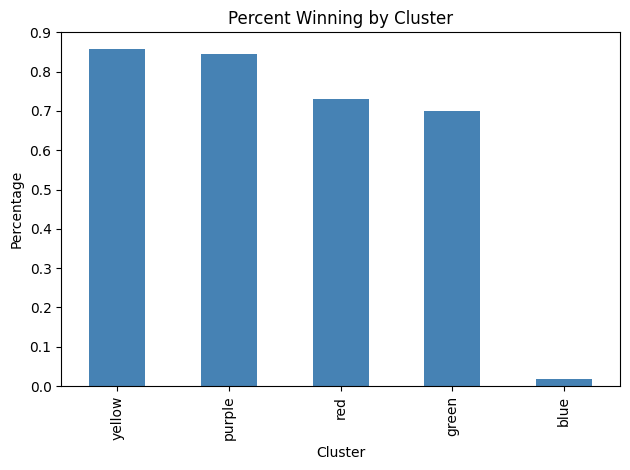

In [ ]:
# Plot
cand_k_stats.plot(kind='bar', x='k_labels', y='Win_Percent', legend=False, color='steelblue')

# Aesthetics
plt.xlabel('Cluster')
plt.ylabel('Percentage')
plt.title('Percent Winning by Cluster')
plt.tight_layout()
plt.show()

### B2. Percent Party Type

In [ ]:
cand_k_stats = cand.groupby("k_labels",as_index=False).agg(
    Cand_Count = ("NewCandID","count"),
    DPP_Count = ("PartyType",lambda x: (x=="DPP").sum()),
    KMT_Count = ("PartyType",lambda x: (x=="KMT").sum()),
    Small_Party_Count = ("PartyType",lambda x: (x=="Small Party").sum()),
    Independent_Count = ("PartyType",lambda x: (x=="No Party").sum())
)
cand_k_stats["DPP_Percent"] = cand_k_stats["DPP_Count"] / cand_k_stats["Cand_Count"]
cand_k_stats["KMT_Percent"] = cand_k_stats["KMT_Count"] / cand_k_stats["Cand_Count"]
cand_k_stats["Small_Party_Percent"] = cand_k_stats["Small_Party_Count"] / cand_k_stats["Cand_Count"]
cand_k_stats["Independent_Percent"] = cand_k_stats["Independent_Count"] / cand_k_stats["Cand_Count"]
cand_k_stacked = cand_k_stats[["k_labels","DPP_Percent","KMT_Percent","Small_Party_Percent","Independent_Percent"]]
cand_k_stacked = cand_k_stacked.sort_values("DPP_Percent",ascending=False).reset_index(drop=True)
cand_k_stacked

,k_labels,DPP_Percent,KMT_Percent,Small_Party_Percent,Independent_Percent
0,green,0.379200,0.418400,0.111200,0.091200
1,purple,0.254451,0.453869,0.055681,0.235999
2,red,0.081822,0.229162,0.016967,0.672048
3,yellow,0.040816,0.244898,0.000000,0.714286
4,blue,0.000000,0.000000,0.155172,0.844828


In [ ]:
cand_k_stacked.set_index('k_labels', inplace=True)

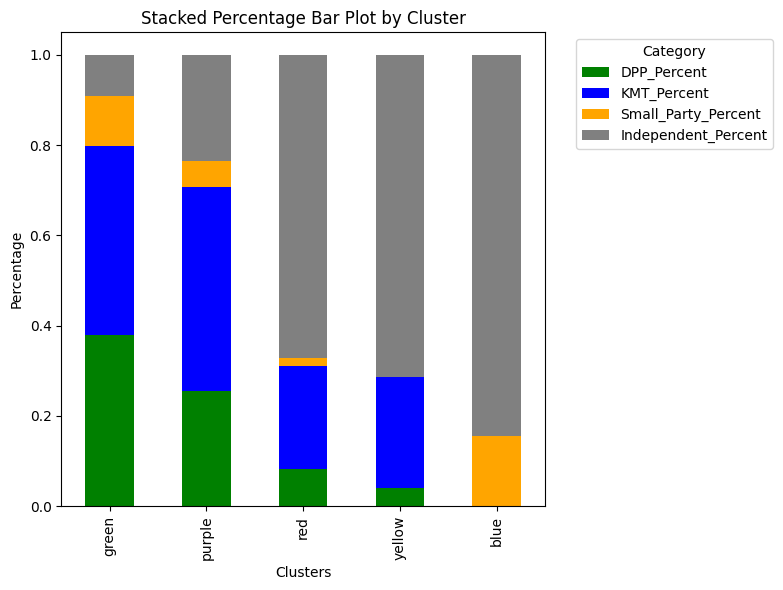

In [ ]:
# Define colors using English names
custom_colors = ['green', 'blue', 'orange', 'gray']

# Plot
ax = cand_k_stacked.plot(kind='bar', stacked=True, figsize=(8, 6), color = custom_colors)

# Aesthetics
plt.xlabel('Clusters')
plt.ylabel('Percentage')
plt.title('Stacked Percentages of Party Type by Cluster')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### B3. You Choose

### B4. You Choose

# Datathon 4 Instructions & Rubric

https://docs.google.com/document/d/1MU06rk3PKc3AhkuFYP6ChdWCQSK0U87O/edit

